In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import simulationlib as sl
import lasinglib as ll
import measurelib as ml
import numpy as np

In [49]:
TAP_dbpath = r"C:\Users\ssuub\Desktop\MPSD-TAP\TAPV-2\Application\pythonFiles\DataTextFiles"

# This works for most sequences and is reasonably fast to simulate
CHIP = sl.SimGrid(dimension=32, resolution=101, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

SILICON = sl.Material(diffusivity=88, emissivity=0.09, specific_heat=0.7, density=0.002329002)
CENTERING_OFFSETS = (-2, -1.5)

In [50]:
LEDGE = 1
REDGE = 31
coords = np.arange(LEDGE, REDGE + 1, 1)
xg, yg = np.meshgrid(coords, coords)
POWER = 2

pulses = []

for x in coords:
    pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=0.03, position=(x, LEDGE), power=POWER, sigma=ll.DEFAULT_LASER_SIGMA))
for y in coords:
    pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=0.03, position=(REDGE, y), power=POWER, sigma=ll.DEFAULT_LASER_SIGMA))
for x in coords:
    pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=0.03, position=(REDGE + LEDGE - x, REDGE), power=POWER, sigma=ll.DEFAULT_LASER_SIGMA))
for y in coords:
    pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=0.03, position=(LEDGE, REDGE + LEDGE - y), power=POWER, sigma=ll.DEFAULT_LASER_SIGMA))


In [51]:
seq = ll.LaserSequence(pulses, delay=0.2, start_time=0)

LaserSequence(['Pulse(2.000W, 0.000 + 0.030S -> 0.030NOMOD)', 'Pulse(2.000W, 0.230 + 0.030S -> 0.260NOMOD)', 'Pulse(2.000W, 0.460 + 0.030S -> 0.490NOMOD)', 'Pulse(2.000W, 0.690 + 0.030S -> 0.720NOMOD)', 'Pulse(2.000W, 0.920 + 0.030S -> 0.950NOMOD)', 'Pulse(2.000W, 1.150 + 0.030S -> 1.180NOMOD)', 'Pulse(2.000W, 1.380 + 0.030S -> 1.410NOMOD)', 'and 118 additional pulse(s).'])


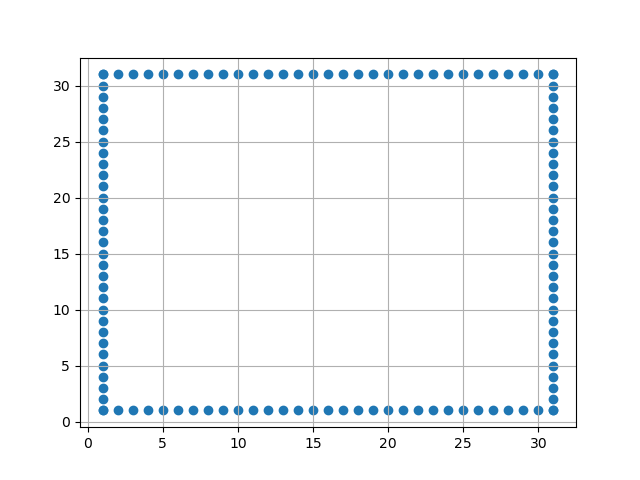

In [52]:
seq.build_trace()
print(seq)
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y)
ax.grid()

In [53]:
seq.write_to_cycle_code(TAP_dbpath + "/michaeltest1.txt", 0.1, *CENTERING_OFFSETS)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Entries: {}


This database is linked to ./annealing records/example database/example_database.csv.


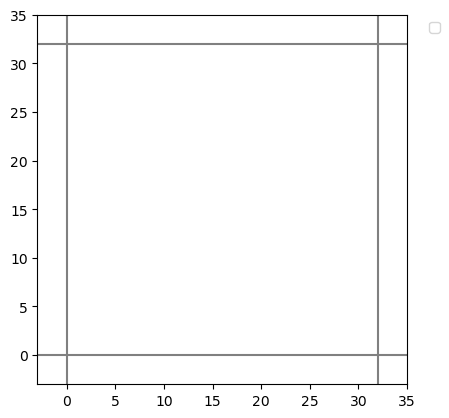